## Part 1 - OOP

### Task A. Design the Class Hierarchy
1. **Identify the Classes**:

2. **Determine the Relationships Between Them**:

3. **Plot a Suitable Diagram**:

![Mini_assignment diagram.png](<attachment:Mini_assignment diagram.png>)
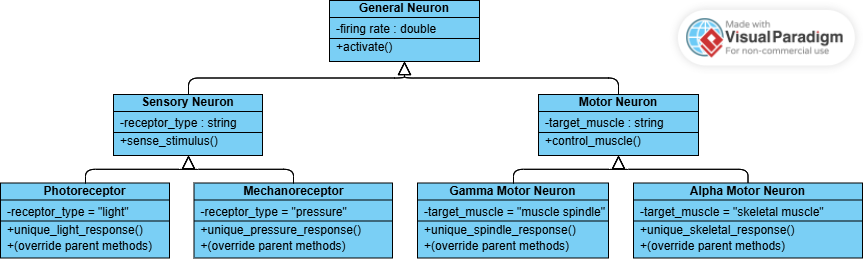

### Task B. Define the Classes (No Need to Implement the Functions Themselves)

1. **Define Base, Intermediate, and Leaf Classes**

2. **Define Base Class Attributes and Methods**

3. **Add Any Unique Attributes or Methods Required by the Intermediate Classes**

4. **Add Any Unique Attributes or Methods Required by the Leaf Classes**

5. **Override Methods If Needed**

In [1]:
# Base Class: General Neuron
class GeneralNeuron():
    # Constructor with a default value
    def __init__(self, firing_rate=0.0):
        self.firing_rate = firing_rate

    # Method to calculate a firing rate based on the strength of a stimulus
    def activate(self, stimulus_strength):
        pass


# Intermidiate Class: Sensory Neuron
class SensoryNeuron(GeneralNeuron):
    # Constructor with default values
    def __init__(self, firing_rate=0.0, receptor_type=""):
        super().__init__(firing_rate)
        self.receptor_type = receptor_type

    # Method to activate the neuron based on the strength or type of a stimulus
    def sense_stimulus(self, stimulus_strength):
        self.activate(stimulus_strength)
        pass


# Leaf Class: Photoreceptor
class Photoreceptor(SensoryNeuron):
    # Constructor with a fixed receptor type for light sensitivity
    def __init__(self, firing_rate=0.0):
        super().__init__(firing_rate, receptor_type="light")
         
    # Calculate specific firing rate for the stimulus received
    def activate(self, stimulus_strength):
        self.firing_rate = stimulus_strength * 0.2
        pass

    # Method to process light intensity and activate the neuron
    def sense_stimulus(self, light_intensity):
        self.activate(light_intensity)
        pass

    # Method for unique behavior in response to light
    def unique_light_response(self, light_intensity):
        pass


# Leaf Class: Mechanoreceptor
class Mechanoreceptor(SensoryNeuron):
    # Constructor with a fixed receptor type for pressure sensitivity
    def __init__(self, firing_rate=0.0):
        super().__init__(firing_rate, receptor_type="pressure")
         
    # Calculate specific firing rate for the stimulus received
    def activate(self, stimulus_strength):
        self.firing_rate = stimulus_strength * 0.3
        pass
  
    # Method to process pressure input and activate the neuron
    def sense_stimulus(self, pressure_level):
        self.activate(pressure_level)
        pass

    # Method for unique behavior in response to pressure
    def unique_pressure_response(self, pressure_level):
        pass



# Intermediate Class: Motor Neuron
class MotorNeuron(GeneralNeuron):
    # Constructor with default values
    def __init__(self, firing_rate=0.0, target_muscle=""):
        super().__init__(firing_rate)
        self.target_muscle = target_muscle

    # Method to trigger a response in the target muscle based on activation level
    def control_muscle(self, activation_level):
        pass


# Leaf Class: Alpha Motor Neuron
class AlphaMotorNeuron(MotorNeuron):
    # Constructor with a fixed target muscle for skeletal muscle control
    def __init__(self, firing_rate=0.0):
        super().__init__(firing_rate, target_muscle="skeletal muscle")
         
    # Calculate specific firing rate for the stimulus received
    def activate(self, stimulus_strength):
        self.firing_rate = stimulus_strength * 0.5
        pass

    # Method to control skeletal muscle based on activation level
    def control_muscle(self, activation_level):
        self.activate(activation_level)
        pass

    # Method for response specific to skeletal muscles
    def unique_skeletal_response(self, activation_level):
        pass


# Leaf Class: Gamma Motor Neuron
class GammaMotorNeuron(MotorNeuron):
    # Constructor with a fixed target muscle for muscle spindle control
    def __init__(self, firing_rate=0.0):
        super().__init__(firing_rate, target_muscle="muscle spindle")
         
    # Calculate specific firing rate for the stimulus received
    def activate(self, stimulus_strength):
        self.firing_rate = stimulus_strength * 0.4
        pass

    # Method to control muscle spindle based on activation level
    def control_muscle(self, activation_level):
        self.activate(activation_level)
        pass

    # Method for response specific to muscle spindles
    def unique_spindle_response(self, activation_level):
        pass

In [ ]:
pip install numpy matplotlib pandas scikit-learn

Downsized sample is a linear graph because there aren't enough data points


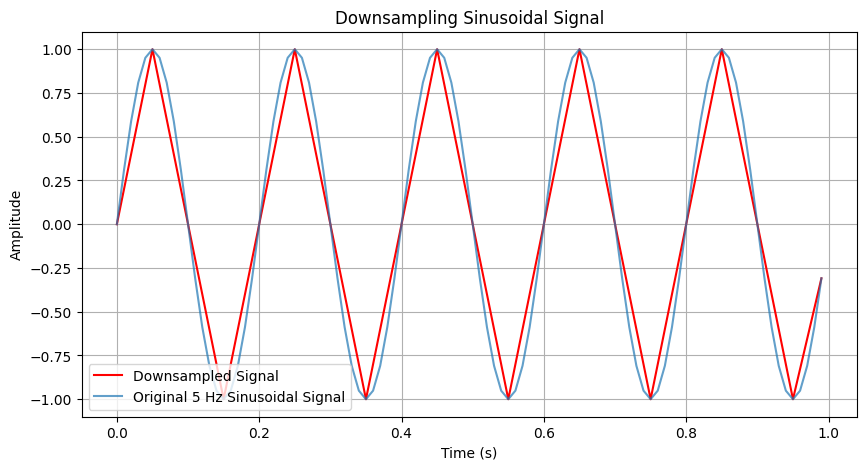

In [3]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

downsample_factor = 5

# Function to downsample a signal by a factor (5)
def downsample_sin(signal: np.array):
    # input signal: frequency 5, sample gap = 0.01 s
    
    # downsize the array by the factor
    downsampled_indices = np.arange(0, len(signal), downsample_factor)

    # Finding the peaks and troughs
    diff_arr = np.diff(signal)
    troughs = np.where((diff_arr[:-1] < 0) & (diff_arr[1:] > 0))[0] + 1
    peaks = np.where((diff_arr[:-1] > 0) & (diff_arr[1:] < 0))[0] + 1
    # Combine and sort indices of extrema
    extrema_indices = np.sort(np.concatenate((peaks, troughs)))
    # Combining the indices
    combined_indices = np.unique(np.concatenate((downsampled_indices, extrema_indices)))
    # adding the last index
    last_index = len(signal) - 1
    combined_indices = np.unique(np.append(combined_indices, last_index))

    # Get the downsampled signal (y values)
    downsampled_signal = signal[combined_indices]

    
    # Plot the downsized signal
    plt.figure(figsize=(10, 5))
    plt.plot(t[combined_indices], downsampled_signal, color='red', label='Downsampled Signal')

    return downsampled_signal



# Test the function
t = np.arange(0, 1, 0.01)  # Time vector (0 to 1 second, sampled every 0.01s)
frequency = 5  # 5 Hz
signal = np.sin(2 * np.pi * frequency * t)


# call the function (plots within the function to follow function guidelines of the assignment)
downsampled_signal = downsample_sin(signal)
# Plot the original signal
plt.plot(t, signal, label='Original 5 Hz Sinusoidal Signal', alpha=0.7)

print("Downsized sample is a linear graph because there aren't enough data points")

# More plot info
plt.title('Downsampling Sinusoidal Signal')
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')
plt.grid()
plt.legend()
plt.show()

### Q2 

#### part 1

Plot the price of all the laptops

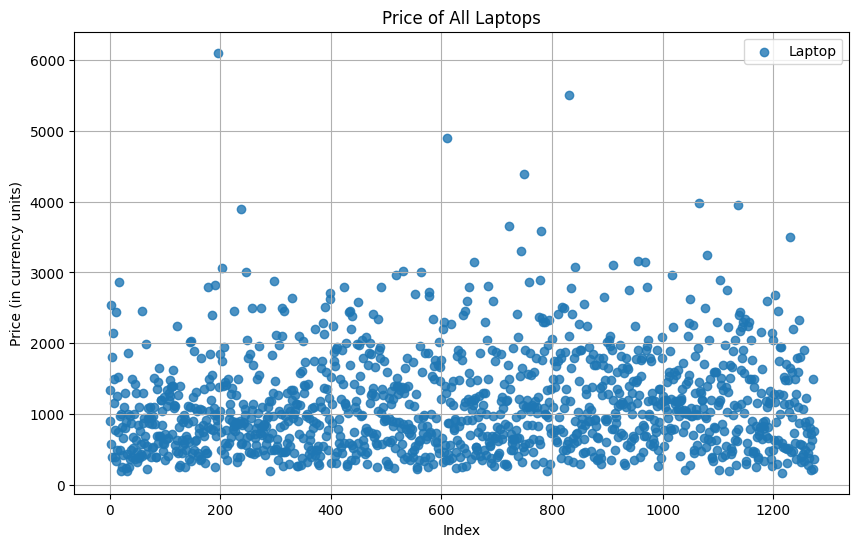

In [4]:
# Path to the laptop dataset
file_path = 'laptop_price - dataset.csv'

# Reading the CSV file, saving as a dataframe
data = pd.read_csv(file_path)

# Plot the laptop prices on a scatter plot
plt.figure(figsize=(10, 6))
plt.scatter(data.index, data['Price (Euro)'], marker='o', alpha=0.8, label="Laptop")
plt.title('Price of All Laptops')
plt.xlabel('Index')
plt.ylabel('Price (in currency units)')
plt.grid()
plt.legend()
plt.show()

#### Part 2

Which company has on average the most expensive laptop? What is the average
laptop price for each company?

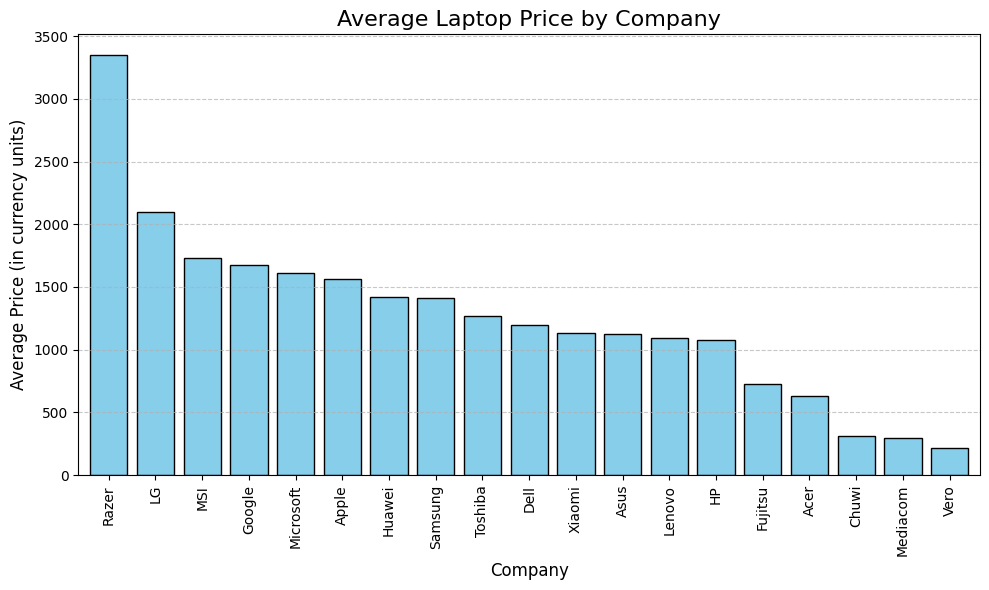

In [5]:
# Group the data by company
grouped = data.groupby('Company')

# Get the mean for every group
average_price = grouped['Price (Euro)'].mean()

# Sort the average prices from largest to smallest
average_price_sorted = average_price.sort_values(ascending=False)

# Plot the average prices as a bar graph
plt.figure(figsize=(10, 6))
average_price_sorted.plot(kind='bar', width = 0.8 ,color='skyblue', edgecolor='black')

# Add titles and labels
plt.title('Average Laptop Price by Company', fontsize=16)
plt.xlabel('Company', fontsize=12)
plt.ylabel('Average Price (in currency units)', fontsize=12)
plt.xticks(rotation=90, fontsize = 10)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()

#### Part 3

Find the different types of Operating systems present in the data - under the column
name 'OpSys'.
- Please note - there are operating systems that are the same systems and just
written differently in the column - please fix them to be uniform.

In [6]:
# Defining operating system names:
mac_str = 'Mac OS'
windows_str = 'Windows'

# Cleaning - Replacing the data to be uniform
data['OpSys'] = data['OpSys'].replace({'macOS':mac_str, 'Mac OS X':mac_str, 'Windows 10':windows_str, 'Windows 10 S':windows_str, 'Windows 7':windows_str})

# Print the fixed uniform operating systems
OP_Systems_Fixed = data['OpSys'].unique()
print("After Fix: ", OP_Systems_Fixed)

After Fix:  ['Mac OS' 'No OS' 'Windows' 'Linux' 'Android' 'Chrome OS']


#### Part 4

Plot for each of the operating system types the distribution of the prices, so that the
number of plots equals to the number of unique operating systems.

['Mac OS' 'No OS' 'Windows' 'Linux' 'Android' 'Chrome OS']


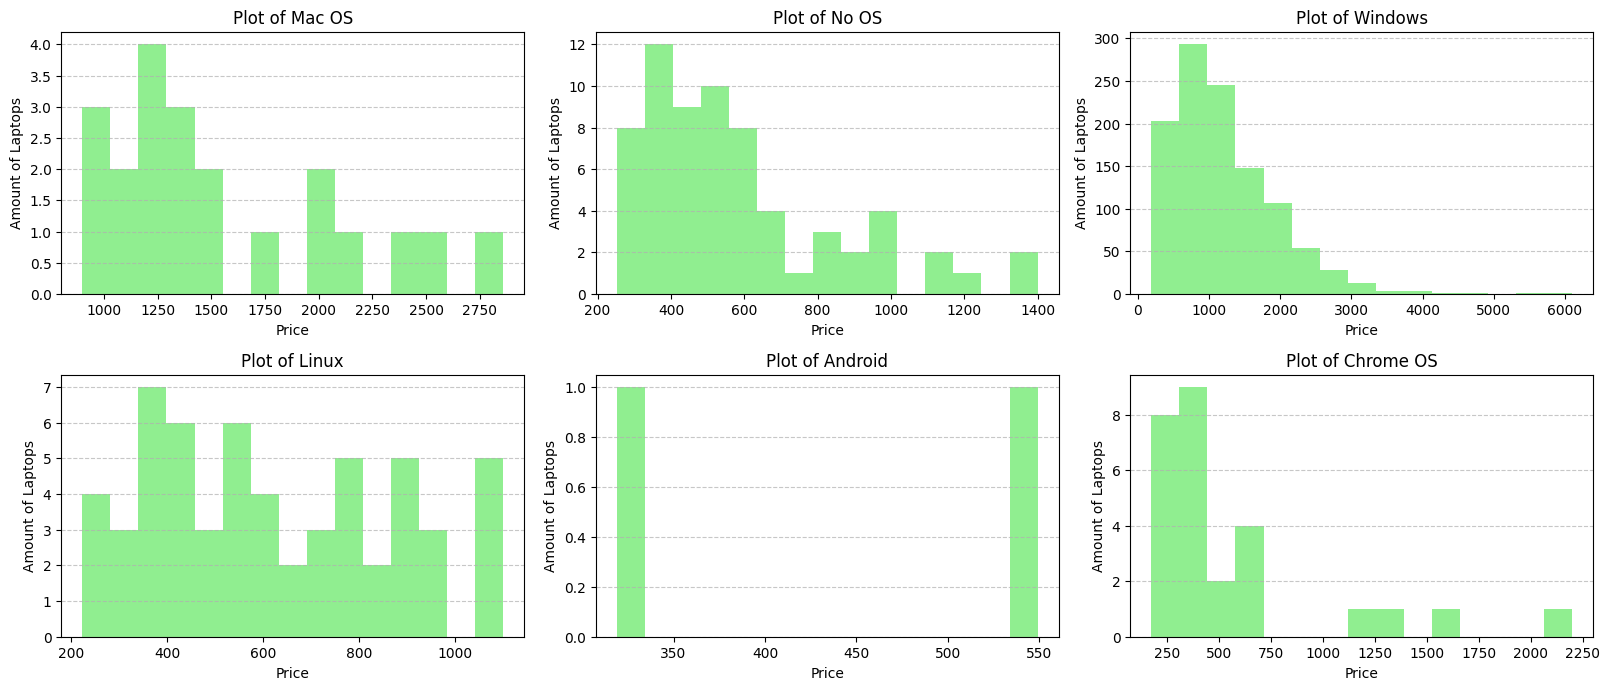

In [7]:
# Getting the different types of OS
unique_opsys = data['OpSys'].unique()
print(unique_opsys)

# Creating the plot
plt.figure(figsize= (16,10))

# Looping through each operating system and subplotting it
for i, op_sys in enumerate(unique_opsys, 1):
    plt.subplot(3, 3, i)
    data[data['OpSys'] == op_sys]['Price (Euro)'].hist(bins=15, color='lightgreen', grid=False)
    plt.title(f"Plot of {op_sys}")
    plt.xlabel("Price")
    plt.ylabel("Amount of Laptops")
    plt.grid(axis='y', linestyle='--', alpha=0.7)
    
plt.tight_layout()
plt.show()

#### Part 5

What is the relationship between RAM and computer price? add an adequate plot to
support your findings.

In [8]:
# cleaning up irrelevant data (extreme cases)
data = data[data['RAM (GB)'] != 64]

There's a positive correlation between them.


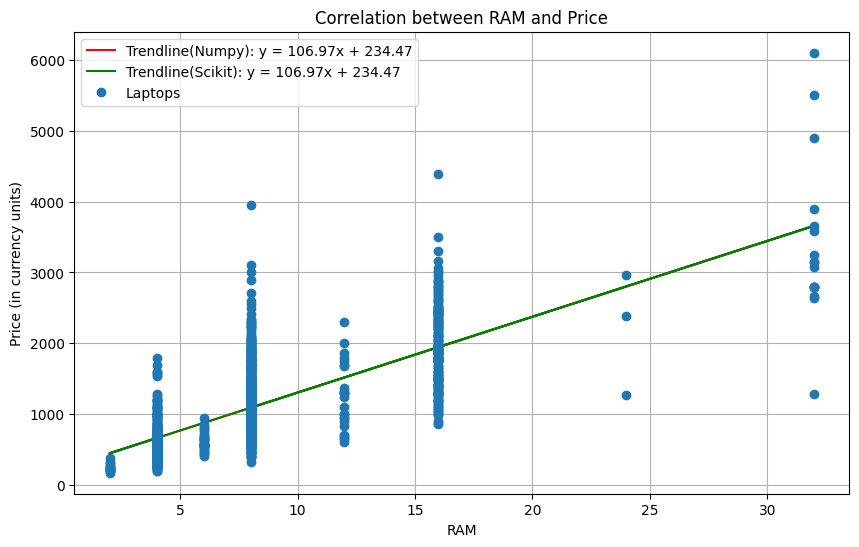

In [9]:
from sklearn.linear_model import LinearRegression
print("There's a positive correlation between them.")

plt.figure(figsize=(10, 6))

# Save the arrays of data
x = data['RAM (GB)']
x_2d = data[['RAM (GB)']]
y = data['Price (Euro)']

# Numpy: Calculate linear regression
# Calculate linear regression coefficients (slope `m` and intercept `c`)
m, c = np.polyfit(x, y, 1)  # Degree 1 for linear regression
# Plot the regression line
plt.plot(x, m * x + c, color='red', label=f'Trendline(Numpy): y = {m:.2f}x + {c:.2f}')


# Scikit: Calculate linear regression
# Create the model
model = LinearRegression()
# Train the model
model.fit(x_2d, y)
# Get the slope (coef_) and intercept
m = model.coef_[0]  # Slope
c = model.intercept_  # Intercept
# Predict values
y_pred = model.predict(x_2d)
plt.plot(x, y_pred, color='green', label=f'Trendline(Scikit): y = {m:.2f}x + {c:.2f}')

# Plot laptop prices
plt.plot(data['RAM (GB)'], data['Price (Euro)'], marker='o', linestyle='', label='Laptops')
plt.title('Correlation between RAM and Price')
plt.xlabel('RAM')
plt.ylabel('Price (in currency units)')
plt.grid()
plt.legend()
plt.show()

#### Part 6

Create a new column for the dataframe called "Storage type" that extracts the
storage type from the column "Memory".
- For example, in the first row in the column "Memory" it states "128GB SSD",
the new column will have just "SSD" in its first row.

In [10]:
# Extract storage type
data['Storage type'] = data['Memory'].str.extract(r'(SSD|HDD|Hybrid|Flash Storage)')

# Display the updated DataFrame
print(data.head())

  Company      Product   TypeName  Inches                    ScreenResolution  \
0   Apple  MacBook Pro  Ultrabook    13.3  IPS Panel Retina Display 2560x1600   
1   Apple  Macbook Air  Ultrabook    13.3                            1440x900   
2      HP       250 G6   Notebook    15.6                   Full HD 1920x1080   
3   Apple  MacBook Pro  Ultrabook    15.4  IPS Panel Retina Display 2880x1800   
4   Apple  MacBook Pro  Ultrabook    13.3  IPS Panel Retina Display 2560x1600   

  CPU_Company       CPU_Type  CPU_Frequency (GHz)  RAM (GB)  \
0       Intel        Core i5                  2.3         8   
1       Intel        Core i5                  1.8         8   
2       Intel  Core i5 7200U                  2.5         8   
3       Intel        Core i7                  2.7        16   
4       Intel        Core i5                  3.1         8   

                Memory GPU_Company                GPU_Type   OpSys  \
0            128GB SSD       Intel  Iris Plus Graphics 640  Mac 

C:\Users\adrie\AppData\Local\Temp\ipykernel_8976\2352775784.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Storage type'] = data['Memory'].str.extract(r'(SSD|HDD|Hybrid|Flash Storage)')


## Bonus Question

Think of additional questions related to this data. What types of
analyses and visualizations would you use to address them? Select two questions from
your list and implement. Submit your list of questions, suggested analyses and
visualization and the implementation.

### My questions:
1. What is the correlation between size of Ram, CPU, CPU Frequency and GPUs? If a computer has a powerful part, are the rest of the parts powerful too? 
2. What is the correlation between all the categories and price? Can I use machine learning to predict the price of other models based on other categories?
3. Does a better screen resolution mean a bigger sized screen?
4. What is the correlation between the type of storage (SSD, HDD, or hybrid) and laptop weight (taking into account laptop size)?

### Question 1 - 
What is the correlation between size of Ram, CPU, CPU Frequency and GPUs? If a computer has a powerful part, are the rest of the parts powerful too? 

Steps:
1. We need to quantify all categories. 
2. Then we will perform a correlation analysis
3. Review the results.

In [11]:
import re
import seaborn as sns
# Step 1: Quantify categories

# CPU model grade
def quantify_cpu(cpu_type):
    if 'i3' in cpu_type:
        return 1
    elif 'i5' in cpu_type:
        return 2
    elif 'i7' in cpu_type:
        return 3
    elif 'i9' in cpu_type:
        return 4
    else:
        return 0  # Default for unknown types
    
# cpu generation finder
def extract_generation(cpu_type):
    # Use regex to find a sequence of 4 digits
    match = re.search(r'\b\d{4}\b', cpu_type)
    if match:
        # Return the first digit of the 4-digit number as the generation
        return int(match.group(0))
    return 0  # Default if no match is found

# GPU Grader
def quantify_gpu(gpu_type):
    if 'Quadro' in gpu_type:
        return 4  # Professional GPU
    elif 'HD Graphics' in gpu_type or 'Iris' in gpu_type:
        return 1  # Integrated GPU
    elif 'Radeon' in gpu_type or 'GeForce GTX' in gpu_type:
        return 2  # Mid-range GPU
    elif 'RTX' in gpu_type or 'Radeon Pro' in gpu_type:
        return 3  # High-end GPU
    else:
        return 0  # Unknown GPU type

data = data.copy()
# CPU model score
data['CPU_Score'] = data['CPU_Type'].apply(quantify_cpu)
# Extract generation
data['CPU_Generation'] = data['CPU_Type'].apply(extract_generation)
# Combine CPU and generation scores for a comprehensive CPU score
data['Combined_CPU_Score'] = data['CPU_Score'] + data['CPU_Generation'] / 1000
# GPU model score
data['GPU_Score'] = data['GPU_Type'].apply(quantify_gpu)

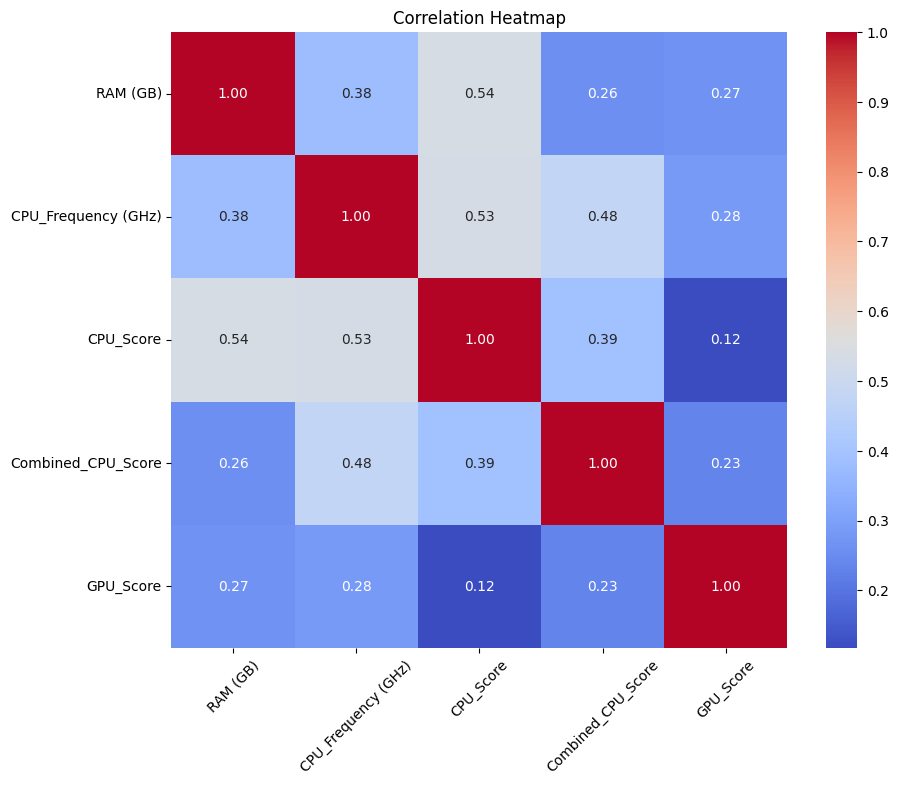

In [12]:
# Step 3: Analysing results

from sklearn.preprocessing import MinMaxScaler
#  Normalize the relevant columns using MinMaxScaler
columns_to_process = ['RAM (GB)', 'CPU_Frequency (GHz)', 'CPU_Score', 'Combined_CPU_Score', 'GPU_Score']
scaler = MinMaxScaler()
scaled_data = scaler.fit_transform(data[columns_to_process])

# Convert the scaled data back into a DataFrame
scaled_df = pd.DataFrame(scaled_data, columns=columns_to_process)

# Calculate the correlation matrix
correlation_matrix = scaled_df.corr()

# Visualize the correlation matrix as a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, fmt='.2f', cmap='coolwarm', square=True, cbar=True)
plt.title('Correlation Heatmap')
plt.xticks(rotation=45)
plt.yticks(rotation=0)
plt.show()

#### Results:
It seems there is not much correlation. This may be attributed to a small quantity of data (only 1000 rows) or an inaccurate calculation of grading the CPUs and GPUs. To continue further I would download a bigger dataset, correct the grading systems and maybe would find a correlation. In the meantime, there seems to be no correlation between the different processing parts of a laptop.

### Question 2 - 
What is the correlation between all the categories and price? Can I use machine learning to predict the price of other models based on other categories?

Steps:
1. Create a heatmap of correlation of all categories to better understand data.
2. Create the model
3. Train the model on most of the data
4. Test the model on the rest of the data, see how it performs
5. For fun, test on a real world example

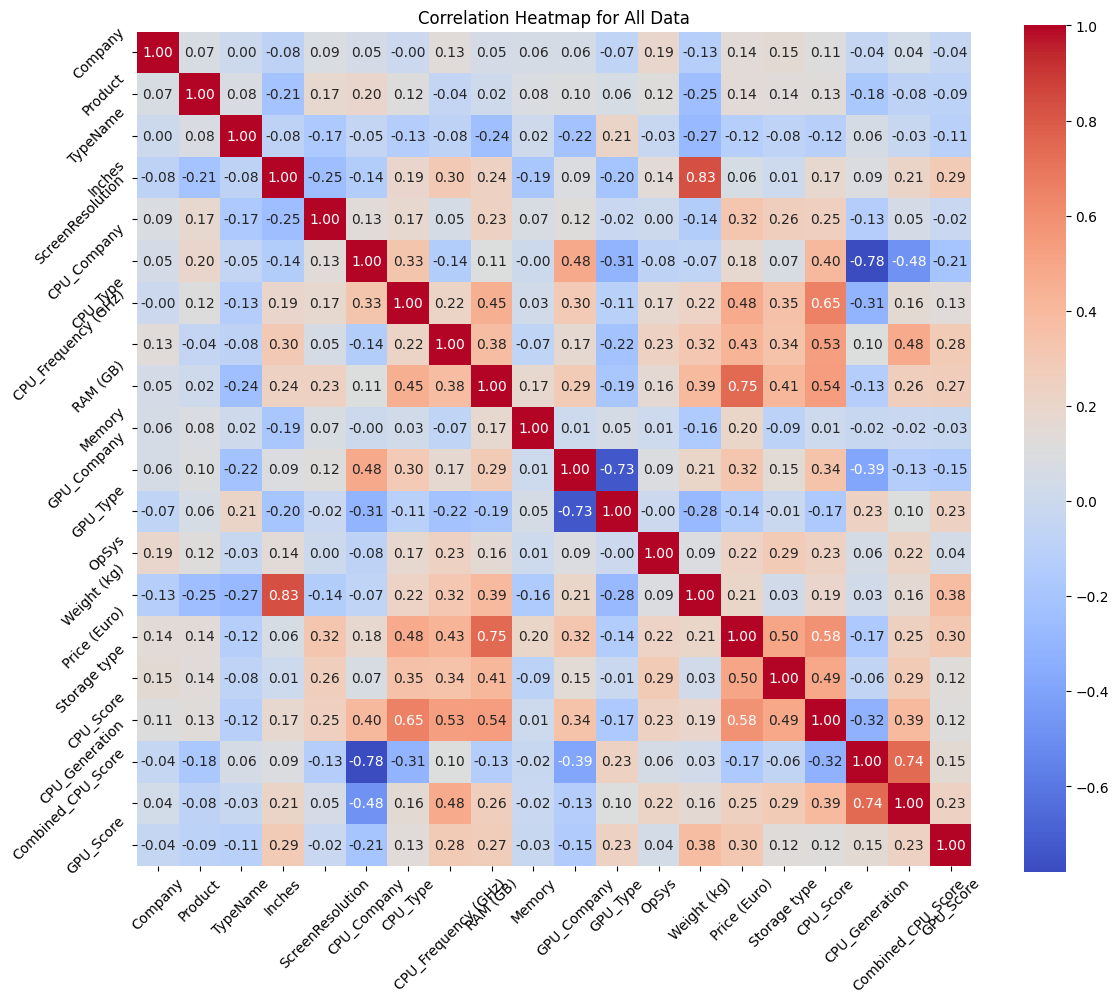

In [13]:
# Step 1: Creating a heat map of the correlation between all categories
from sklearn.preprocessing import LabelEncoder, MinMaxScaler
# Work on a copy of the dataset to preserve the original
data_copy2 = data.copy()

# Identify text columns
text_columns = data_copy2.select_dtypes(include=['object']).columns.tolist()

# Convert text columns to numeric using Label Encoding
label_encoders = {}
for col in text_columns:
    le = LabelEncoder()
    data_copy2[col] = le.fit_transform(data_copy2[col])
    label_encoders[col] = le  # Save the encoder for potential reverse lookup

# Select numeric columns (now includes transformed text columns)
numeric_columns = data_copy2.select_dtypes(include=['float64', 'int64']).columns.tolist()

# Normalize all numeric columns
scaler = MinMaxScaler()
normalized_data = scaler.fit_transform(data_copy2[numeric_columns])

# Create a normalized DataFrame
normalized_df = pd.DataFrame(normalized_data, columns=numeric_columns)

# Calculate the correlation matrix
correlation_matrix = normalized_df.corr()

# Plot the heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, fmt='.2f', cmap='coolwarm', square=True, cbar=True)
plt.title('Correlation Heatmap for All Data')
plt.xticks(rotation=45)
plt.yticks(rotation=45)
plt.tight_layout()
plt.show()

In [14]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np

# Step 2: Create the model
# Features: Use all numeric columns except the target ('Price (Euro)')
features = data_copy2.drop(columns=['Price (Euro)'])
target = data_copy2['Price (Euro)']

# Step 3: Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)

# Step 3: Train the model
model = RandomForestRegressor(random_state=42)
model.fit(X_train, y_train)

# Step 4: Test the model
y_pred = model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error (MSE): {mse:.2f}")
print(f"R-squared (R2): {r2:.2f}")

Mean Squared Error (MSE): 64016.99
R-squared (R2): 0.88


### Now let's test the data on a real world example:

In [15]:
# Define the real-world example (I input the specs on a real world laptop)
real_world_example_data = {
    'Company': 'Lenovo',
    'Product': 'ThinkPad Yoga',
    'TypeName': '2 in 1 Convertible',
    'Inches': 13.3,
    'ScreenResolution': 'IPS Panel Full HD / Touchscreen 1920x1080',
    'CPU_Company': 'Intel',
    'CPU_Type': 'Core i5 7200U',
    'CPU_Frequency (GHz)': 3.5,
    'RAM (GB)': 8,
    'Memory': '256GB SSD',
    'GPU_Company': 'Intel',
    'GPU_Type': 'HD Graphics 620',
    'OpSys': 'Windows',
    'Weight (kg)': 1.44,
    'Storage type': 'SSD'
}

# Convert to DataFrame for consistency
real_world_example = pd.DataFrame([real_world_example_data])

# Add calculated features
real_world_example['CPU_Score'] = real_world_example['CPU_Type'].apply(quantify_cpu)
real_world_example['CPU_Generation'] = real_world_example['CPU_Type'].apply(extract_generation)
real_world_example['Combined_CPU_Score'] = (
    real_world_example['CPU_Score'] + real_world_example['CPU_Generation'] / 10
)
real_world_example['GPU_Score'] = real_world_example['GPU_Type'].apply(quantify_gpu)

# Transform text features to numeric values
for col, le in label_encoders.items():
    if col in real_world_example:
        real_world_example[col] = le.transform(real_world_example[col])

# Ensure all features are present and in the correct order
real_world_example = real_world_example[features.columns]

# Step 4: Predict the price
predicted_price = model.predict(real_world_example)

print(f"Predicted Price for the real-world example: €{predicted_price[0]:.2f}")


Predicted Price for the real-world example: €1487.92


### We got the predicted price - 1487 euros! Let's compare it to the real price:

![Screenshot 2024-12-16 221016.png](<attachment:Screenshot 2024-12-16 221016.png>)
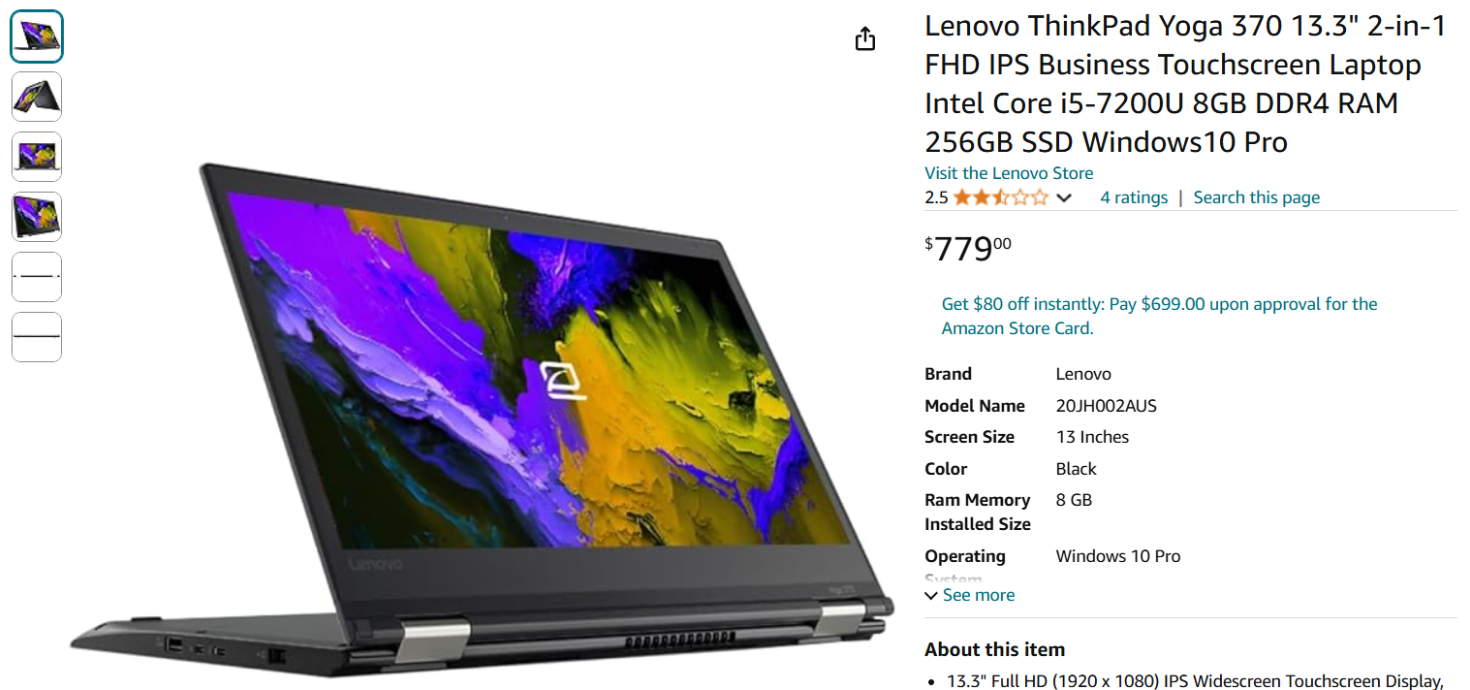

### We were way off!

My conclusion is that the dataset doesn't contain enough data and is improperly saved/cleaned up, and possibly the data is outdated, therefore the price was significantly higher. With a proper dataset, the model could work.